# Spatial Classification Prelimenary Results

### Required Setup

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random

In [159]:
## To visualize the results better
def plot_pose_dictionary_entry(df, index):
    row = df.iloc[index]

    # Defining the points for plotting
    alignment_x = [row['head_x'], row['chest_x'], row['hip_x']]
    alignment_y = [row['head_y'], row['chest_y'], row['hip_y']]
    hip_knee_right_x = [row['hip_x'], row['landmark_26_x']]
    hip_knee_right_y = [row['hip_y'], row['landmark_26_y']]
    hip_knee_left_x = [row['hip_x'], row['landmark_25_x']]
    hip_knee_left_y = [row['hip_y'], row['landmark_25_y']]
    lower_alignment_right_x = [row['landmark_26_x'], row['footR_x']]
    lower_alignment_right_y = [row['landmark_26_y'], row['footR_y']]
    lower_alignment_left_x = [row['landmark_25_x'], row['footL_x']]
    lower_alignment_left_y = [row['landmark_25_y'], row['footL_y']]

    filename = row['filename']
    filename_img = cv2.imread(filename)
    filename_img = cv2.cvtColor(filename_img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    title = row['name'] + ", " + row['orientation']
    
    axes[0].set_title(title)
    axes[0].imshow(filename_img)
    axes[0].axis('off')

    axes[1].set_title("Pose X,Y")
    axes[1].plot(alignment_x, alignment_y, color=mcolors.CSS4_COLORS['lightsteelblue'], label="Spine", marker='_', alpha=0.5)
    axes[1].plot(lower_alignment_left_x, lower_alignment_left_y, color=mcolors.CSS4_COLORS['magenta'], label="Lower Alignment Left", marker='_', alpha=0.5)
    axes[1].plot(lower_alignment_right_x, lower_alignment_right_y, color=mcolors.CSS4_COLORS['green'], label="Lower Alignment Right", marker='_', alpha=0.5)
    axes[1].plot(hip_knee_right_x, hip_knee_right_y, color=mcolors.CSS4_COLORS['blue'], label="Hip to Knee Right", marker='_', alpha=0.5)
    axes[1].plot(hip_knee_left_x, hip_knee_left_y, color=mcolors.CSS4_COLORS['cyan'], label="Hip to Knee Left", marker='_', alpha=0.5)
    
    # Individual points
    axes[1].scatter(row['head_x'], row['head_y'], color=mcolors.CSS4_COLORS['red'], label="Head")
    axes[1].scatter(row['chest_x'], row['chest_y'], color=mcolors.CSS4_COLORS['cyan'], label="Upper Torso")
    axes[1].scatter(row['hip_x'], row['hip_y'], color=mcolors.CSS4_COLORS['blue'], label="Hips")
    axes[1].scatter(row['landmark_26_x'], row['landmark_26_y'], color=mcolors.CSS4_COLORS['green'], label="Knee R")
    axes[1].scatter(row['footR_x'], row['footR_y'], color=mcolors.CSS4_COLORS['orange'], label="Foot R")
    axes[1].scatter(row['landmark_25_x'], row['landmark_25_y'], color=mcolors.CSS4_COLORS['magenta'], label="Knee L")
    axes[1].scatter(row['footL_x'], row['footL_y'], color=mcolors.CSS4_COLORS['purple'], label="Foot L")

    axes[1].set_xlabel("x-axis")
    axes[1].set_ylabel("y-axis")
    axes[1].set_xlim(0, 1)
    axes[1].set_ylim(0, 1)
    axes[1].invert_yaxis()
    axes[1].grid()
    #axes[1].legend()

    fig.tight_layout()
    plt.show()

In [160]:
## Load Data
results = pd.read_csv('results.csv')

upright_poses = results[results['orientation'] == 'upright']
horizontal_poses = results[results['orientation'] == 'horizontal']
diagonal_poses = results[results['orientation'] == 'diagonal']
inverted_poses = results[results['orientation'] == 'inverted']

upright_poses = upright_poses.reset_index(drop=True)
horizontal_poses = horizontal_poses.reset_index(drop=True)
diagonal_poses = diagonal_poses.reset_index(drop=True)
inverted_poses = inverted_poses.reset_index(drop=True)

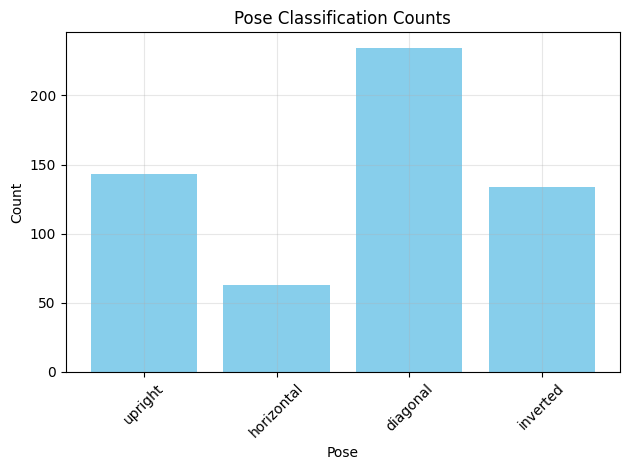

In [161]:
pose_counts = {
    'upright': len(upright_poses),
    'horizontal': len(horizontal_poses),
    'diagonal': len(diagonal_poses),
    'inverted': len(inverted_poses)
}

poses = list(pose_counts.keys())
counts = list(pose_counts.values())

plt.bar(poses, counts, color='skyblue')
plt.title('Pose Classification Counts')
plt.xlabel('Pose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(alpha=0.3)
plt.show()

## Upright Poses

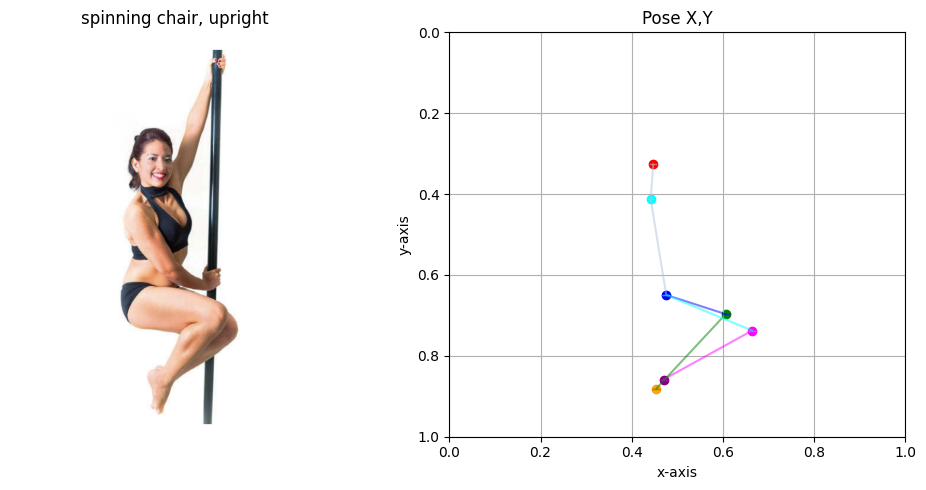

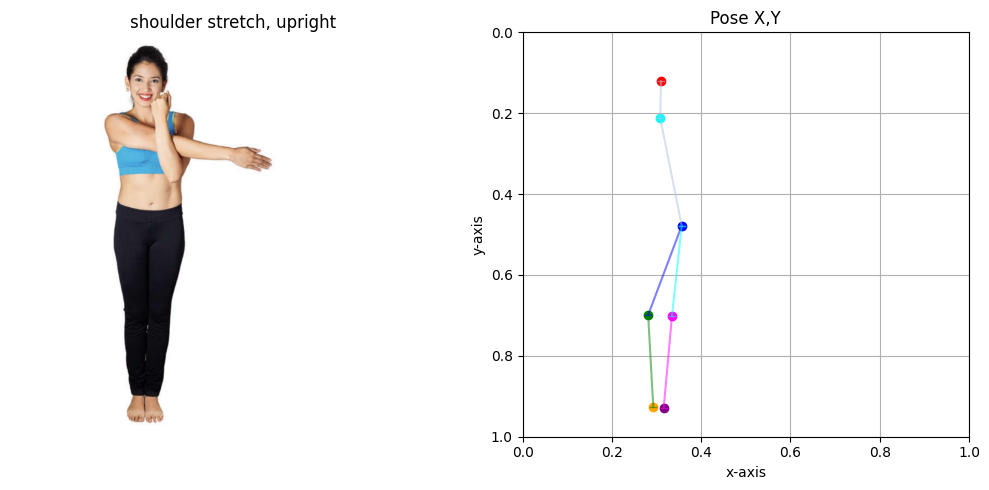

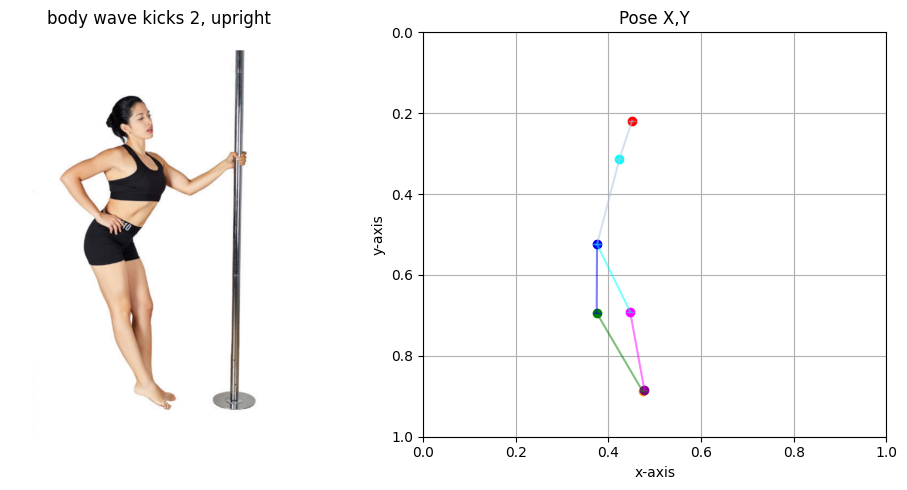

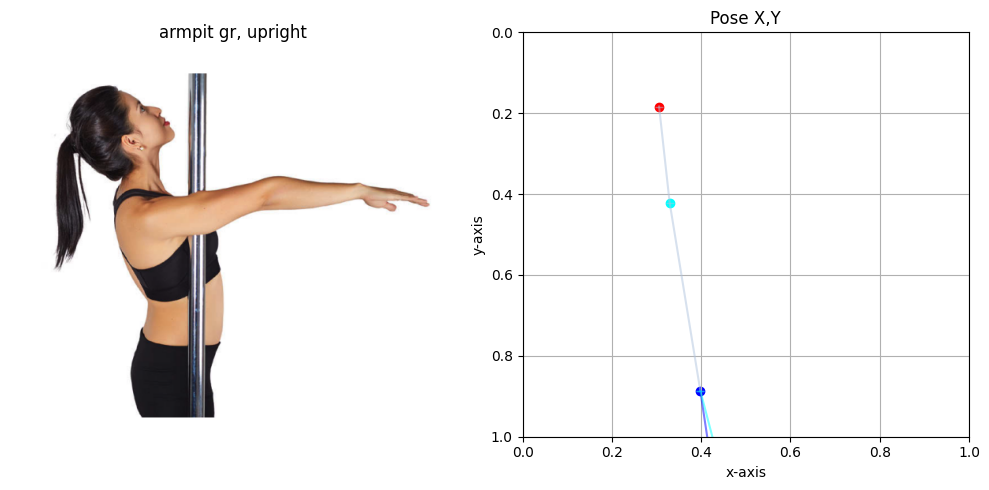

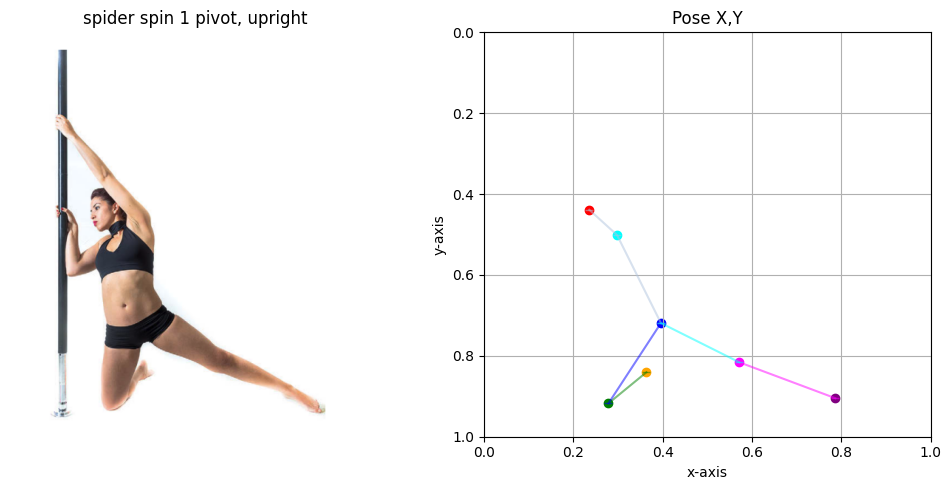

In [152]:
random_indices = random.sample(range(len(upright_poses)), 5)

for i in random_indices:
    plot_pose_dictionary_entry(upright_poses, i)

## Horizontal Poses

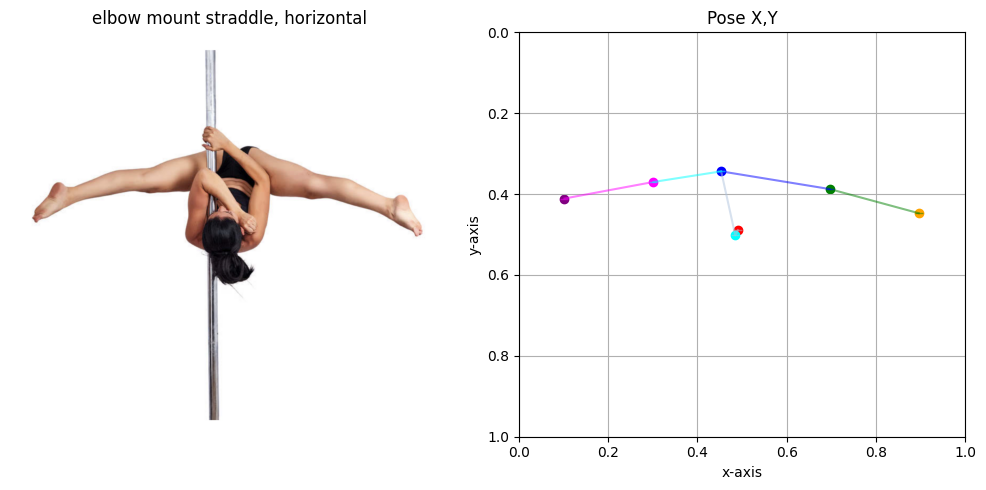

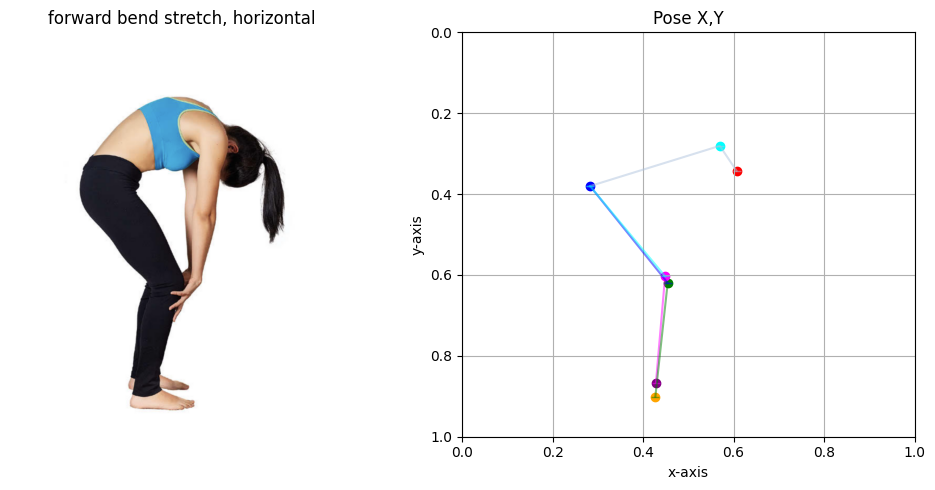

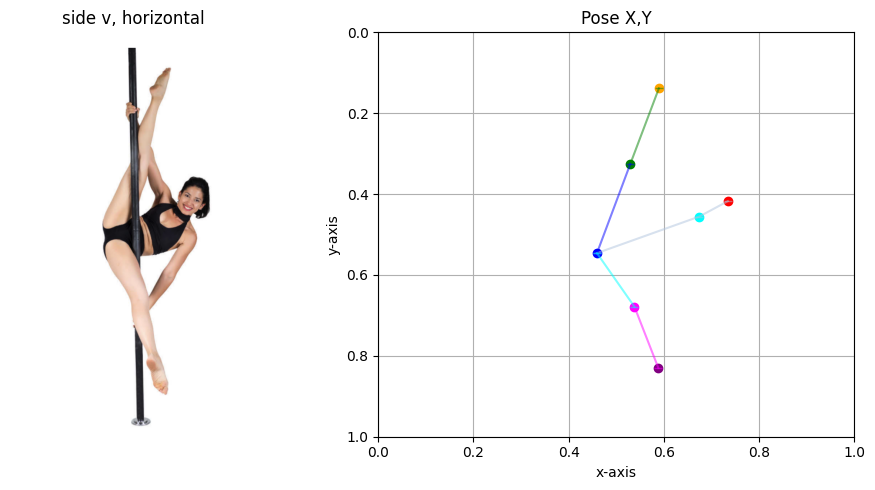

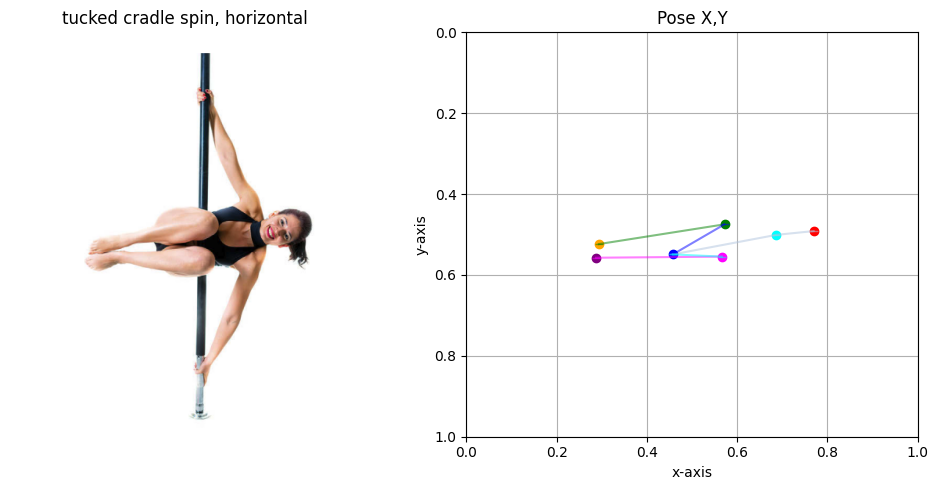

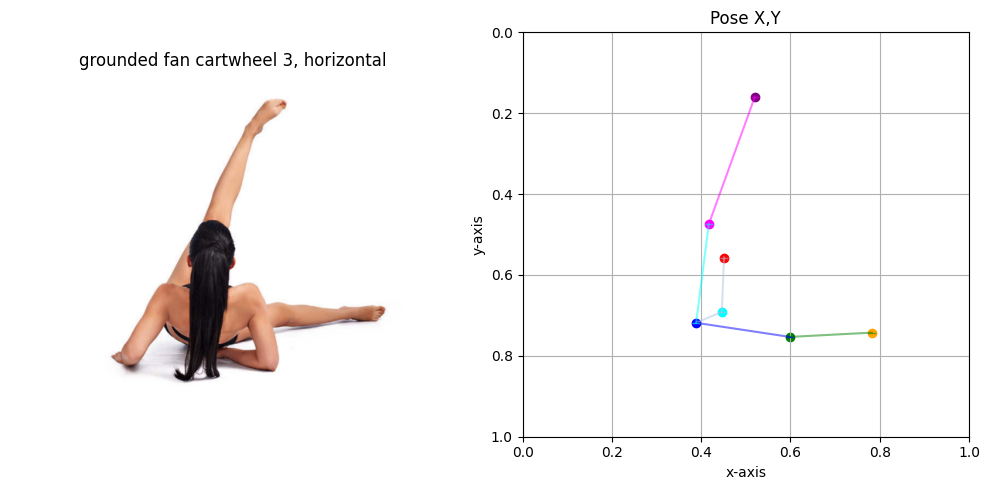

In [153]:
random_indices = random.sample(range(len(horizontal_poses)), 5)

for i in random_indices:
    plot_pose_dictionary_entry(horizontal_poses, i)

## Inverted Poses

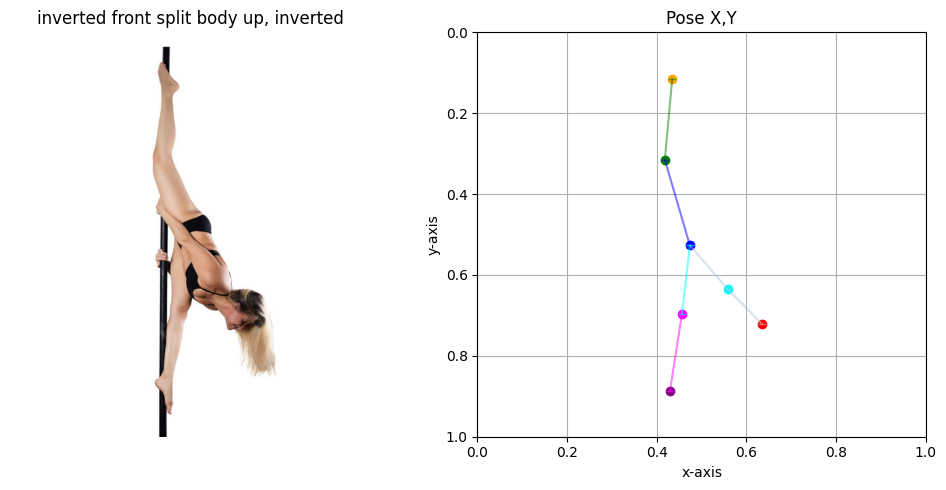

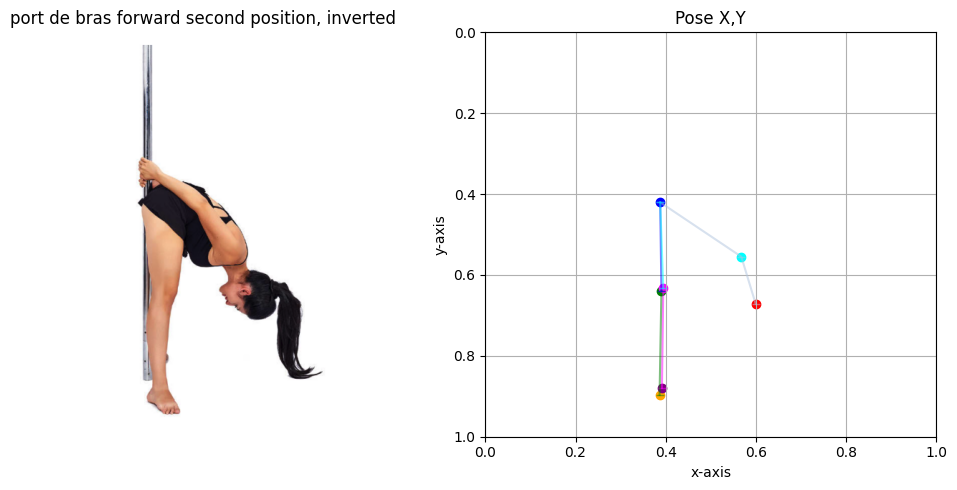

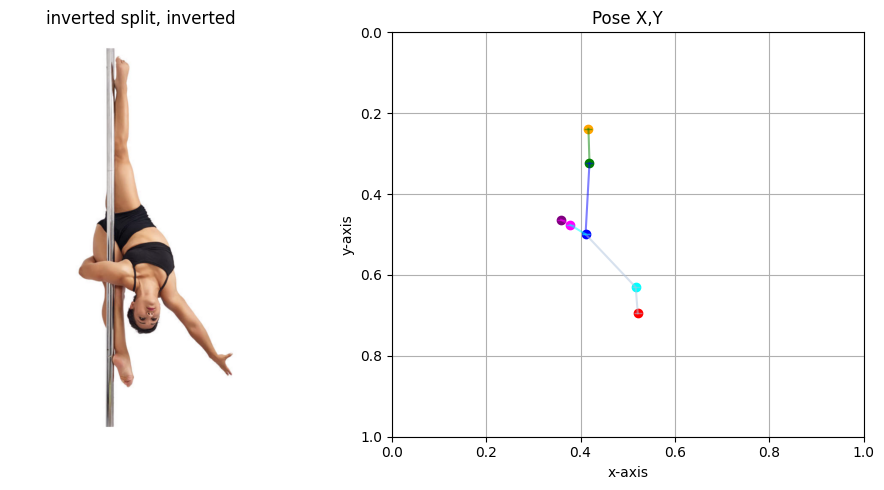

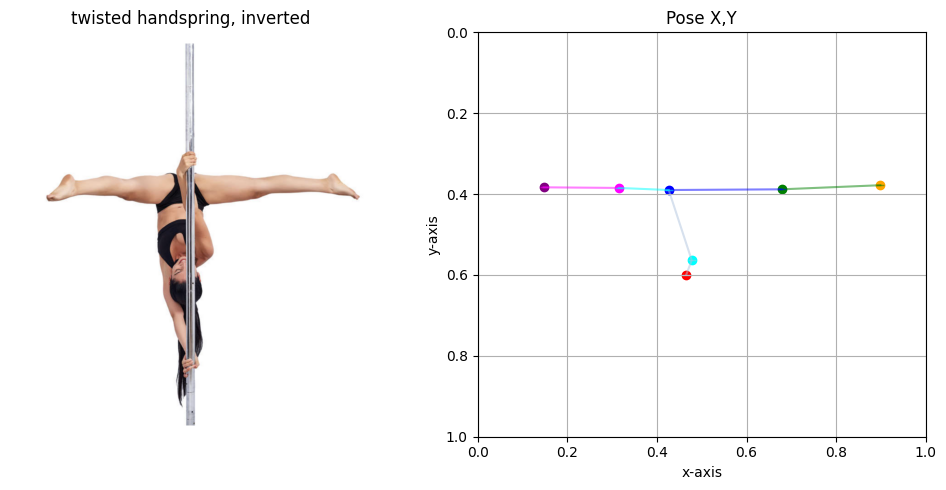

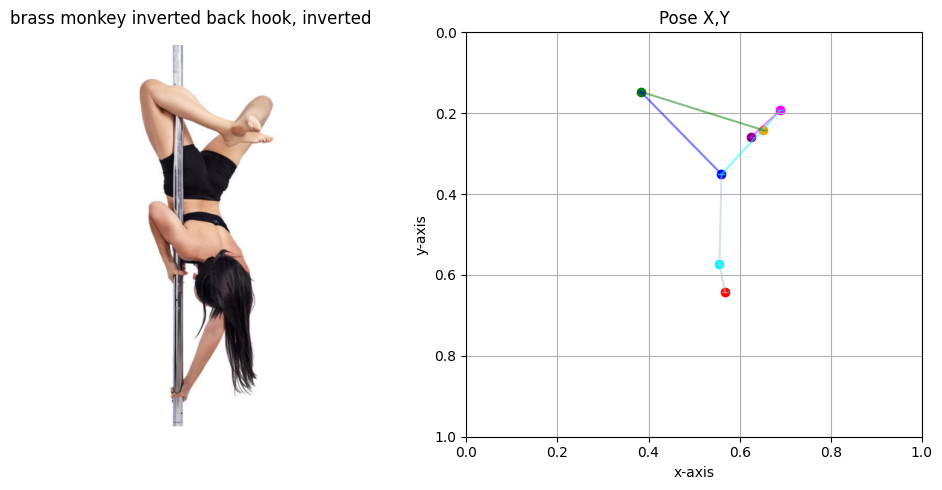

In [154]:
random_indices = random.sample(range(len(inverted_poses)), 5)

for i in random_indices:
    plot_pose_dictionary_entry(inverted_poses, i)

## Diagonal Poses

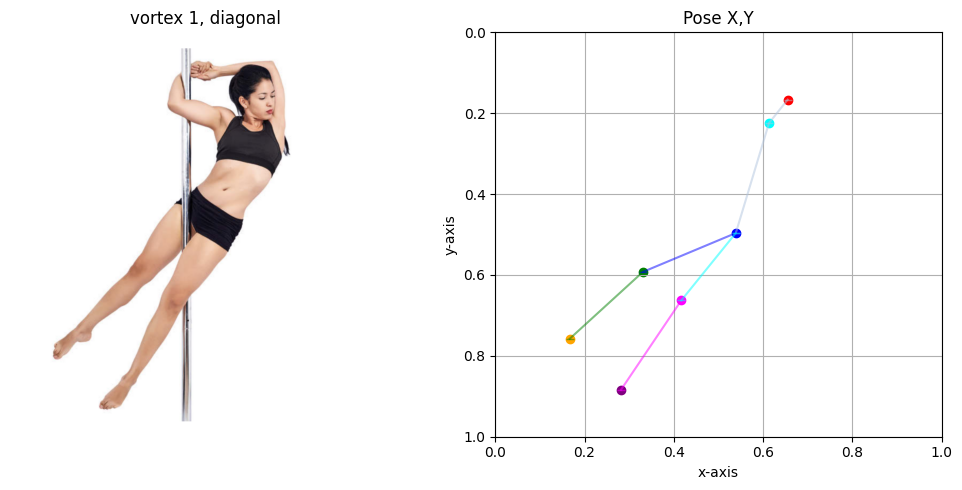

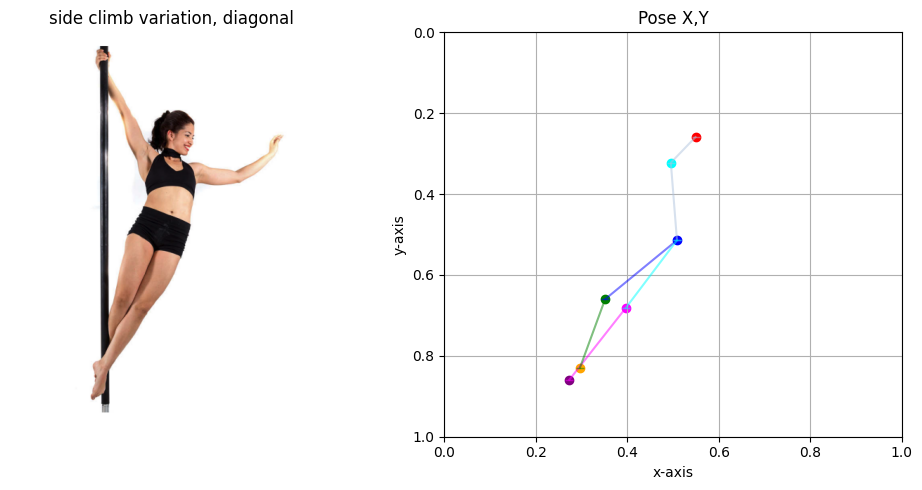

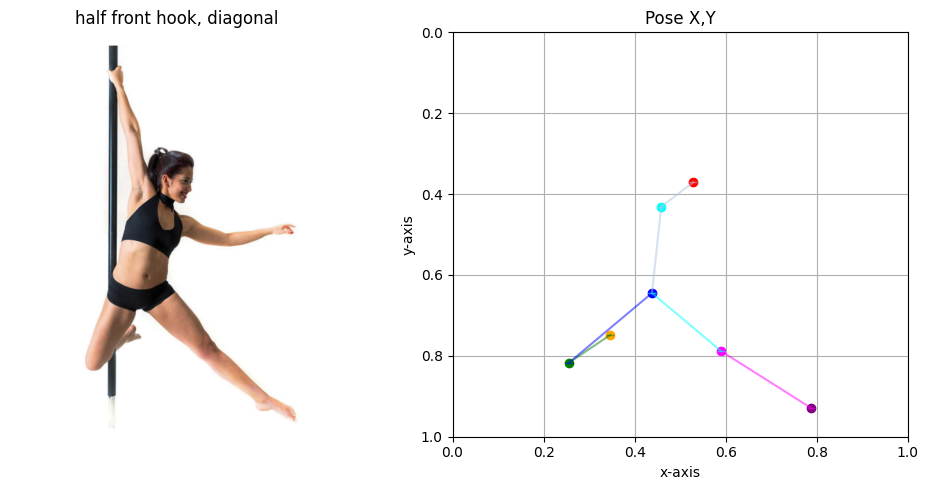

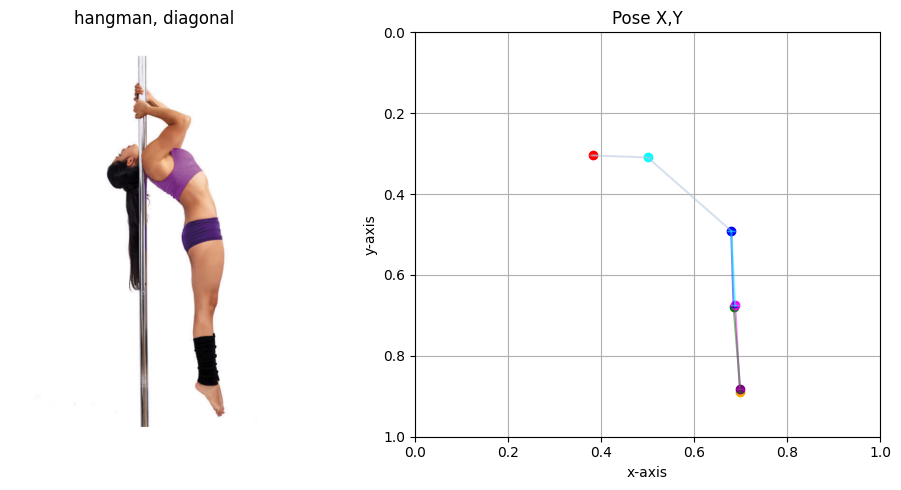

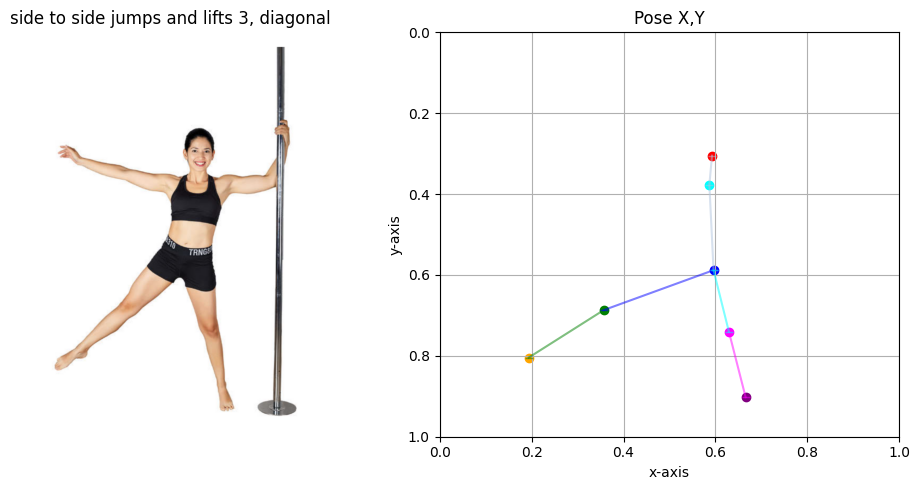

In [162]:
random_indices = random.sample(range(len(diagonal_poses)), 5)

for i in random_indices:
    plot_pose_dictionary_entry(diagonal_poses, i)